In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
data5=pd.read_csv('titanic-training-data.csv')

In [3]:
data5.shape

(891, 12)

In [4]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
data5.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

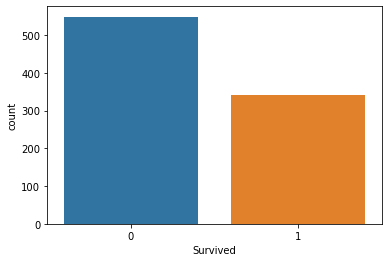

In [6]:
sns.countplot(x='Survived',data=data5)

<AxesSubplot:xlabel='Survived', ylabel='count'>

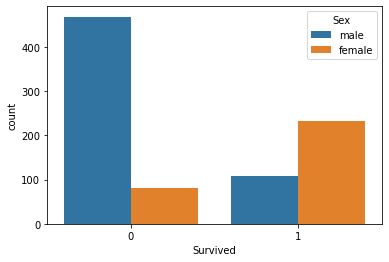

In [7]:
sns.countplot(x='Survived',hue= "Sex",data=data5)

### Data Wrangling

In [8]:
data5.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

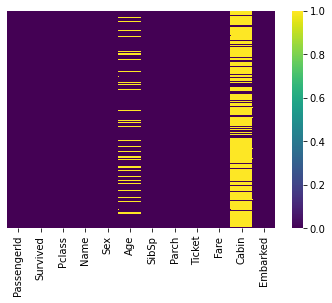

In [9]:
sns.heatmap(data5.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

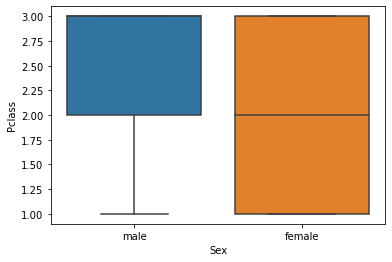

In [10]:
sns.boxplot(x="Sex",y="Pclass",data=data5)


In [11]:
data5.drop(["Cabin"],axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
data5.dropna(inplace=True)


In [13]:
data5.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [14]:
Sex=pd.get_dummies(data5['Sex'])
Sex.head()

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [15]:
Sex=pd.get_dummies(data5['Sex'],drop_first=True)
Sex.head()


,male
1,0
3,0
6,1
10,0
11,0


In [16]:
embark=pd.get_dummies(data5["Embarked"])
embark.head()

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


In [17]:
embark=pd.get_dummies(data5["Embarked"],drop_first=True)
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [18]:
pcl=pd.get_dummies(data5["Pclass"],drop_first=True)
pcl.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [19]:
data5=pd.concat([data5,Sex,embark,pcl],axis=1)


In [20]:
data5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [21]:
data5.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass",'Cabin'],axis=1,inplace=True)


In [22]:
data5.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
X=data5.drop("Survived",axis=1)
y=data5["Survived"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [26]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\users\dheerendra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6727272727272727

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.77      0.69      0.73        35

    accuracy                           0.67        55
   macro avg       0.66      0.67      0.66        55
weighted avg       0.69      0.67      0.68        55



<AxesSubplot:>

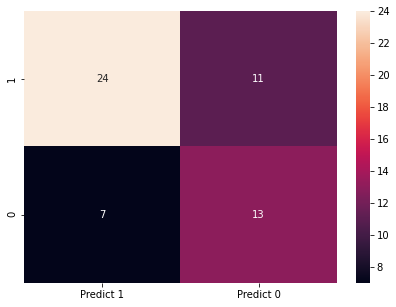

In [31]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')